# Basic SQL Queries – Tutorial


In [ ]:
#Step 1: Setup SQLite in Colab
import sqlite3
import pandas as pd

sqlite3 is a built-in Python module. \\

It allows you to create and interact with SQLite databases. \\

SQLite is a lightweight, serverless database engine — perfect for small apps, testing, or local storage.

**Why Do We Use import sqlite3?** \\
Because without importing it, Python won’t know how to work with SQL databases.

It gives you access to commands like:

**sqlite3.connect(...)** → Connect to a database

**cursor.execute(...)** → Run SQL commands (like CREATE, SELECT, INSERT, etc.)

**conn.commit()** → Save changes

**conn.close()** → Close the database connection



In [ ]:
#Step 2: Create a connection and cursor
# Create an in-memory database
conn = sqlite3.connect(':memory:')  # creates a new SQLite database connection.  # ':memory:', it tells SQLite to create a temporary database in RAM (memory).
cursor = conn.cursor()  #  creates a cursor object from the database connection #  cursor object, which is used to interact with the database.

**What is cursor.execute()?** \\

A cursor is an object used to interact with the database.

The method cursor.execute() is used to execute SQL commands — like CREATE TABLE, SELECT, INSERT, UPDATE, etc.

In [ ]:
#Create a sample table
cursor.execute('''
CREATE TABLE Employees (
    ID INTEGER,
    Name TEXT,
    Department TEXT,
    Salary INTEGER,
    JoinDate TEXT
)
''')

In [ ]:
 # Insert sample data
 employees = [
    (1, 'Alice', 'HR', 50000, '2020-01-10'),
    (2, 'Bob', 'IT', 60000, '2019-03-15'),
    (3, 'Charlie', 'Sales', 55000, '2021-06-20'),
    (4, 'Diana', 'IT', 65000, '2018-11-30'),
    (5, 'Eve', 'HR', 52000, '2022-02-25')
]

cursor.executemany('INSERT INTO Employees VALUES (?, ?, ?, ?, ?)', employees) #inserts multiple rows of data into the Employees table
conn.commit() # Saves (commits) the changes to the database.



In [ ]:
 # Run your SQL queries
query = "SELECT * FROM Employees WHERE Department = 'IT';"
df = pd.read_sql_query(query, conn)
df

,ID,Name,Department,Salary,JoinDate
0,2,Bob,IT,60000,2019-03-15
1,4,Diana,IT,65000,2018-11-30


**What Are Aggregate Functions?** \\
Aggregate functions perform a calculation on a group of rows and return a single value.

**Function	Description** \\
COUNT()	- Counts the number of rows \\
SUM()	- Adds up numeric values \\
AVG()	- Calculates the average \\
MIN()	- Returns the minimum value \\
MAX()	- Returns the maximum value \\

Sample Table : Employee

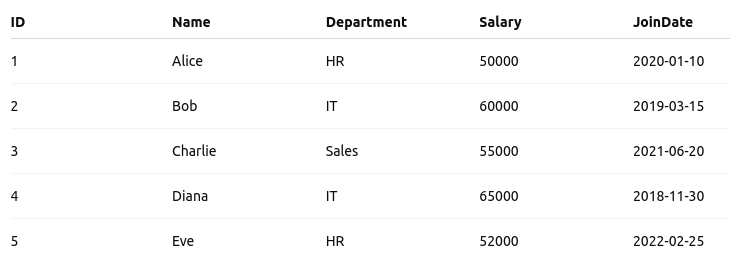

In [ ]:
import pandas as pd

df = pd.read_sql_query("SELECT Department, AVG(Salary) AS AvgSalary FROM Employees GROUP BY Department", conn)
print(df)


  Department  AvgSalary
0         HR    51000.0
1         IT    62500.0
2      Sales    55000.0


In [ ]:
cursor.execute("SELECT COUNT(*) FROM Employees") #  Run SQL commands (like CREATE, SELECT, INSERT, etc.)
result = cursor.fetchone()   # COUNT() - Counts the number of rows

# Print the result
print("Number of employees:", result[0])

Number of employees: 5


In [ ]:
# average salary
cursor.execute("SELECT AVG(Salary) FROM Employees;")
result = cursor.fetchone()
# Print the result
print("Number of employees:", result[0])

Number of employees: 56400.0


In [ ]:
#  GROUP BY — Group Rows to Aggregate
# The GROUP BY clause groups rows that have the same value in a column so that aggregate functions can be applied per group.

# example : Average Salary Per Department
cursor.execute('''
SELECT Department, AVG(Salary)
FROM Employees
GROUP BY Department
''')

# fetch all rows from the result (one row per department)
result = cursor.fetchall()

# print each row nicely
for row in result:
    print("Department:", row[0], "| Average Salary:", row[1])


Department: HR | Average Salary: 51000.0
Department: IT | Average Salary: 62500.0
Department: Sales | Average Salary: 55000.0


In [ ]:
# Run the COUNT query per department
cursor.execute('''
SELECT Department, COUNT(*) AS NumEmployees
FROM Employees
GROUP BY Department
''')

#  Fetch and print the result
results = cursor.fetchall()
for row in results:
    print("Department:", row[0], "| Number of Employees:", row[1])

Department: HR | Number of Employees: 2
Department: IT | Number of Employees: 2
Department: Sales | Number of Employees: 1


In [ ]:
# Run the SQL query to find the Highest Salary in Each Department
cursor.execute('''
SELECT Department, MAX(Salary) AS HighestSalary
FROM Employees
GROUP BY Department
''')

# Fetch and print results
results = cursor.fetchall()
for row in results:
    print("Department:", row[0], "| Highest Salary:", row[1])

Department: HR | Highest Salary: 52000
Department: IT | Highest Salary: 65000
Department: Sales | Highest Salary: 55000


In [ ]:
# Run the SQL query to find employees with salary < 55000
cursor.execute('''
SELECT * FROM Employees
WHERE Salary < 55000
''')

# Fetch and print results
results = cursor.fetchall()
for row in results:
    print("ID:", row[0], "| Name:", row[1], "| Department:", row[2], "| Salary:", row[3], "| JoinDate:", row[4])


ID: 1 | Name: Alice | Department: HR | Salary: 50000 | JoinDate: 2020-01-10
ID: 5 | Name: Eve | Department: HR | Salary: 52000 | JoinDate: 2022-02-25


# Advanced GROUP BY + Subqueries

### Employees With Salary = MAX Salary in Their Department (Using Subquery)

In [ ]:
cursor.execute('''
SELECT *
FROM Employees e
WHERE Salary = (
    SELECT MAX(Salary)
    FROM Employees
    WHERE Department = e.Department
)
''')

results = cursor.fetchall()
for row in results:
    print("ID:", row[0], "| Name:", row[1], "| Department:", row[2], "| Salary:", row[3], "| JoinDate:", row[4])


ID: 3 | Name: Charlie | Department: Sales | Salary: 55000 | JoinDate: 2021-06-20
ID: 4 | Name: Diana | Department: IT | Salary: 65000 | JoinDate: 2018-11-30
ID: 5 | Name: Eve | Department: HR | Salary: 52000 | JoinDate: 2022-02-25


### Count of Employees in Departments Having More Than 1 Employee

In [ ]:
cursor.execute('''
SELECT Department, COUNT(*) AS NumEmployees
FROM Employees
GROUP BY Department
HAVING COUNT(*) > 1
''')

results = cursor.fetchall()
for row in results:
    print("Department:", row[0], "| Number of Employees:", row[1])


Department: HR | Number of Employees: 2
Department: IT | Number of Employees: 2


### insert new entries in the table

In [ ]:
# Insert new records
cursor.execute('''
INSERT INTO Employees (ID, Name, Department, Salary, JoinDate)
VALUES
(6, 'Frank', 'Sales', 58000, '2023-01-15'),
(7, 'Grace', 'IT', 62000, '2022-05-10'),
(8, 'Henry', 'HR', 51000, '2021-08-05'),
(9, 'Ivy', 'Marketing', 56000, '2020-12-12'),
(10, 'Jack', 'Sales', 54000, '2023-03-03')
''')

# Save changes
conn.commit()

# View updated table
cursor.execute("SELECT * FROM Employees")
rows = cursor.fetchall()
for row in rows:
    print(row)


(1, 'Alice', 'HR', 50000, '2020-01-10')
(2, 'Bob', 'IT', 60000, '2019-03-15')
(3, 'Charlie', 'Sales', 55000, '2021-06-20')
(4, 'Diana', 'IT', 65000, '2018-11-30')
(5, 'Eve', 'HR', 52000, '2022-02-25')
(6, 'Frank', 'Sales', 58000, '2023-01-15')
(7, 'Grace', 'IT', 62000, '2022-05-10')
(8, 'Henry', 'HR', 51000, '2021-08-05')
(9, 'Ivy', 'Marketing', 56000, '2020-12-12')
(10, 'Jack', 'Sales', 54000, '2023-03-03')


### Delete the row

In [ ]:
# Delete the row where ID = 3 (Charlie)
cursor.execute('''
DELETE FROM Employees
WHERE ID = 3
''')

# Save changes
conn.commit()

# Fetch and print updated table
cursor.execute("SELECT * FROM Employees")
rows = cursor.fetchall()
for row in rows:
    print(row)


(1, 'Alice', 'HR', 50000, '2020-01-10')
(2, 'Bob', 'IT', 60000, '2019-03-15')
(4, 'Diana', 'IT', 65000, '2018-11-30')
(5, 'Eve', 'HR', 52000, '2022-02-25')
(1, 'Alice', 'HR', 50000, '2020-01-10')
(2, 'Bob', 'IT', 60000, '2019-03-15')
(4, 'Diana', 'IT', 65000, '2018-11-30')
(5, 'Eve', 'HR', 52000, '2022-02-25')
